# SPRINT 10 Tasca M10 T01 Web scraping i automatització
Descripció

Exercicis de Web Scraping.



## EXERCICI 1
Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)


### WEB SCRAPING DE LA PÀGINA WEB DE LA BOLSA ESPAÑOLA AMB BEAUTIFUL SOUP

In [1]:
# Importo beautifulsoup i amb requests crido la pàgina web
import requests
from bs4 import BeautifulSoup
borsa = requests.get('https://www.bolsamadrid.es/esp/aspx/Portada/Portada.aspx')
borsaSoup = BeautifulSoup(borsa.text, 'lxml')
print(borsaSoup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Wed, 14 Sep 2022 13:03:54 GMT" data-idioma="esp"><meta content="IE=11" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2022" id="ctl00_copyright" name="copyright"/><title>
	Bolsa de Madrid
</title><link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" title="Bolsa de Madrid: Regulación: Circulares e I

limit_output extension: Maximum message size of 10000 exceeded with 96555 characters

In [2]:
# Per saber el títol del web (objecte tipus Tag)
borsaSoup.title

<title>
	Bolsa de Madrid
</title>

In [3]:
#Accedeixo als atributs a través de attrs (objecte tipus Tag)
div_base = borsaSoup.div
div_base['id']

'Base'

In [4]:
div_base.attrs

{'id': 'Base'}

In [5]:
# (objecte tipus NavigableString)
primerParagraf = borsaSoup.p
text = primerParagraf.string
print(text)

None


In [6]:
type(text)
borsaSoup.meta['content']

'IE=11'

In [7]:
# A part de fer servir etiquetes per arribar als objectes, podem fer servir l'atribut "contents", el generador " children" i el també generador "descendents"

In [8]:
inner_div = borsaSoup.div.div

In [9]:
# contents
fills = inner_div.contents
print(fills)

[<ul><li class="mclick"><a href="/?id=ing" target="_self"> English </a></li></ul>]


In [10]:
for child in fills:
    if child.name:  # Ignoramos los saltos de línea
        print(f'{child.name}')

ul


In [11]:
# children
filter = inner_div.children
type(fills)

list

In [12]:
for child in fills:
    if child.name:  # Ignoramos los saltos de línea
        print(f'{child.name}')

ul


In [13]:
# descendants
fills = inner_div.descendants
for child in fills:
    if child.name:
        print(f'{child.name}')

ul
li
a


In [14]:
# Una altra forma de buscar és utilitzant el find i el find_all
td = borsaSoup.find_all('td')
for tds in td:
    print(td)

[<td colspan="6" id="CabeceraArr">
<div id="Idiomas"><ul><li class="mclick"><a href="/?id=ing" target="_self"> English </a></li></ul></div>
<div id="MenuSup"><ul><li class="mclick"><a href="/esp/BMadrid/Contacto.aspx" target="_self"> Contacto </a></li><li class="mclick"><a href="/esp/Inversores/Agenda/HorarioMercado.aspx" target="_self"> Horario Mercado </a></li><li class="mclick"><a href="/esp/aspx/Inversores/Agenda/Calendario.aspx" target="_self"> Calendario bursátil </a></li><li class="mclick"><a href="/esp/RSS.aspx" target="_self"> RSS   <img align="absmiddle" alt="RSS" border="0" src="/images/IconoRSS.png"/> </a></li></ul></div>
</td>, <td class="BaseIzq noimpr" rowspan="3"><div></div></td>, <td class="BaseSep noimpr" rowspan="3"></td>, <td class="BaseMenu" id="CabeceraLogo"><a href="/?id=esp"><img alt="Bolsa de Madrid" border="0" src="/images/Base/LogoBMadrid.gif"/></a></td>, <td class="noimpr" id="Cabecera">
<div id="LogoBME"><a href="https://www.bolsasymercados.es/" target="_bl

limit_output extension: Maximum message size of 10000 exceeded with 128312 characters

In [15]:
# Ara anem a filtrar per atributs
atribut1 = borsaSoup.find_all(id='BuscadorCab')
print(atribut1)

[<div id="BuscadorCab">
<div>Buscador de<br/>empresas</div>
<form action="/esp/aspx/Empresas/BusqEmpresas.aspx" id="formBusq" method="get">
<input autocomplete="off" name="busq" type="text" value="nombre / ISIN / ticker"/>
<div id="divBusq" style="display: none;"></div>
<span class="BtnGris mclick"><a href="javascript:document.forms.formBusq.submitbusq();"><span class="BtnBuscarDcha" title="Buscar"></span></a></span>
</form>
</div>]


In [16]:
atribut2 = borsaSoup.find_all(id='divBusq')
print(atribut2)

[<div id="divBusq" style="display: none;"></div>]


In [17]:
# Filtrem per classes CSS, en aquest cas totes les classes que contenen Menu2
css_menu2 = borsaSoup.find_all('div', class_="Menu2")
print(css_menu2)


[<div class="Menu2 MenuSubOp" menu="m1">
<div class="Menu2 MenuDiv Off" menu="m2"><div class="MenuLink Off"><a href="/esp/BMadrid/BMadrid.aspx" target="_self">Bolsa de Madrid</a></div></div>
<div class="Menu2 MenuDiv Off" menu="m3"><div class="MenuLink Off"><a href="/docs/BMadrid/docsSubidos/Historia_Bolsa_ Española.pdf" target="_blank">Historia de la Bolsa</a></div></div>
<div class="Menu2 MenuDiv Off" menu="m4"><div class="MenuLink MenuConOp Off"><a href="#" target="_self">El Palacio de la Bolsa</a></div></div>
<div class="Menu3 MenuSubOp" menu="m4">
<div class="Menu3 MenuDiv Off" menu="m5"><div class="MenuLink Off"><a href="/125_Palacio_Bolsa/" target="_blank">Historia del Palacio</a></div></div>
<div class="Menu3 MenuDiv Off" menu="m6"><div class="MenuLink Off"><a href="/esp/BMadrid/Palacio/Visita.aspx" target="_self">Visitas Guiadas</a></div></div>
<div class="Menu3 MenuDiv Off" menu="m7"><div class="MenuLink Off"><a href="/esp/BMadrid/Palacio/VisitaVirtual.aspx" target="_self">Vi

limit_output extension: Maximum message size of 10000 exceeded with 39651 characters

### WEB SCRAPING DE LA PÀGINA WEB DE LA WIKIPEDIA AMB BEAUTIFUL SOUP

In [18]:
# Importo beautifulsoup i amb requests crido la pàgina web
import requests
from bs4 import BeautifulSoup
wiki = requests.get('https://ca.wikipedia.org/wiki/Cortals_del_Mig')
wikiSoup = BeautifulSoup(wiki.text, 'lxml')
print(wikiSoup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ca">
<head>
<meta charset="utf-8"/>
<title>Cortals del Mig - Viquipèdia, l'enciclopèdia lliure</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t.",".\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","gener","febrer","març","abril","maig","juny","juliol","agost","setembre","octubre","novembre","desembre"],"wgRequestId":"b4f871e8-607c-41b3-bc33-c693210bdc3a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Cortals_del_Mig","wgTitle":"Cortals del Mig","wgCurRevisionId":30593126,"wgRevisionId":30593126,"wgArticleId":1516491,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Mapes amb diverses figures","Articles amb coordenades","Pàgines amb enllaç commonscat des de Wikidata","Control d'autoritat

limit_output extension: Maximum message size of 10000 exceeded with 50151 characters

In [19]:
# Per saber el títol del web (objecte tipus Tag)
wikiSoup.title

<title>Cortals del Mig - Viquipèdia, l'enciclopèdia lliure</title>

In [20]:
#Accedeixo als atributs a través de attrs (objecte tipus Tag)
div_main = wikiSoup.div
div_main.attrs

{'class': ['mw-page-container']}

In [21]:
# (objecte tipus NavigableString)
primerParagraf = wikiSoup.p
text = primerParagraf.string
print(text)

None


In [22]:
type(text)

NoneType

In [23]:
# A part de fer servir etiquetes per arribar als objectes, podem fer servir l'atribut "contents", el generador " children" i el també generador "descendents"

In [24]:
inner_div = wikiSoup.div.div

In [25]:
# contents
fills = inner_div.contents
print(fills)

['\n', <input class="mw-checkbox-hack-checkbox" id="mw-sidebar-checkbox" type="checkbox"/>, '\n', <header class="mw-header">
<div class="mw-header-aside">
<label aria-controls="mw-panel" class="mw-checkbox-hack-button mw-ui-icon mw-ui-button mw-ui-quiet mw-ui-icon-element" data-event-name="ui.sidebar" for="mw-sidebar-checkbox" id="mw-sidebar-button" role="button" tabindex="0" title="Menú principal">
<span>Mostra o oculta la barra lateral</span>
</label>
<a class="mw-logo" href="/wiki/Portada">
<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/mobile/copyright/wikipedia.png" width="50"/>
<span class="mw-logo-container">
<img alt="Viquipèdia" class="mw-logo-wordmark" src="/static/images/mobile/copyright/wikipedia-wordmark-ca.svg" style="width: 7.5em; height: 1.4375em;"/>
<img alt="l'Enciclopèdia Lliure" class="mw-logo-tagline" height="13" src="/static/images/mobile/copyright/wikipedia-tagline-ca.svg" style="width: 7em; height: 0.8125em;" width="112"/>
</

limit_output extension: Maximum message size of 10000 exceeded with 39507 characters

In [26]:
for child in fills:
    if child.name:  # Ignoramos los saltos de línea
        print(f'{child.name}')

input
header
div
div
input
div
div
div


In [27]:
# children
filter = inner_div.children
type(fills)

list

In [28]:
for child in fills:
    if child.name:  # Ignoramos los saltos de línea
        print(f'{child.name}')

input
header
div
div
input
div
div
div


In [29]:
# descendants
fills = inner_div.descendants
for child in fills:
    if child.name:
        print(f'{child.name}')

input
header
div
label
span
a
img
span
img
img
div
div
a
span
div
form
div
input
input
input
input
nav
div
div
ul
li
a
span
div
input
label
span
div
div
a
span
span
div
a
span
span
div
p
a
span
ul
li
a
span
li
a
span
div
div
nav
div
div
span
div
ul
li
a
span
li
a
span
li
a
span
div
div
span
div
ul
li
a
span
li
a
span
li
a
span
li
a
span
li
a
span
li
a
span
li
a
span
li
a
span
div
div
span
div
ul
li
a
span
li
a
span
li
a
span
li
a
span
li
a
span
li
a
span
li
a
span
div
div
span
div
ul
li
a
span
li
a
span
li
a
span
div
div
span
div
ul
li
a
span
div
div
div
div
div
a
div
div
input
div
div
div
main
a
header
div
input
label
span
span
div
ul
div
span
span
a
h1
span
nav
div
div
div
div
ul
li
a
span
li
a
span
div
input
label
span
div
ul
div
div
div
ul
li
a
span
li
a
span
li
a
span
div
input
label
span
div
ul
li
a
span
li
a
span
li
a
span
div
div
div
div
div
div
table
tbody
tr
th
div
img
tr
td
div
tr
td
style
div
div
table
tbody
tr
td
a
img
tr
td
tr
th
tr
th
td
a
span
a
img
tr
th
td
span
span
a

In [30]:
# Una altra forma de buscar és utilitzant el find i el find_all
nav = wikiSoup.find_all('nav')
for navs in nav:
    print(nav)

[<nav aria-label="Eines personals" class="vector-user-links" role="navigation">
<div class="vector-menu mw-portlet mw-portlet-vector-user-menu-overflow vector-user-menu-overflow" id="p-vector-user-menu-overflow">
<div class="vector-menu-content">
<ul class="vector-menu-content-list"><li class="user-links-collapsible-item mw-list-item" id="pt-createaccount-2"><a href="/w/index.php?title=Especial:Crea_compte&amp;returnto=Cortals+del+Mig" title="Us animem a crear un compte i iniciar una sessió, encara que no és obligatori"><span>Crea un compte</span></a></li></ul>
</div>
</div>
<div class="vector-menu mw-portlet mw-portlet-personal vector-user-menu vector-user-menu-logged-out vector-menu-dropdown" id="p-personal" title="Més opcions">
<input aria-haspopup="true" class="vector-menu-checkbox" data-event-name="ui.dropdown-p-personal" id="p-personal-checkbox" role="button" type="checkbox"/>
<label class="vector-menu-heading mw-ui-button mw-ui-quiet mw-ui-icon mw-ui-icon-element mw-ui-icon-elli

limit_output extension: Maximum message size of 10000 exceeded with 35910 characters

In [31]:
# Ara anem a filtrar per atributs
atribut1 = wikiSoup.find_all(id='content')
print(atribut1)

[<main class="mw-body" id="content" role="main">
<a id="top"></a>
<header class="mw-body-header">
<div class="vector-menu mw-portlet mw-portlet-lang vector-menu-dropdown" id="p-lang-btn">
<input aria-haspopup="true" aria-label="This article exist only in this language. Add the article for other languages" class="vector-menu-checkbox mw-interlanguage-selector" data-event-name="ui.dropdown-p-lang-btn" id="p-lang-btn-checkbox" role="button" type="checkbox"/>
<label class="vector-menu-heading mw-ui-progressive mw-portlet-lang-heading-0 mw-ui-button mw-ui-quiet" for="p-lang-btn-checkbox" id="p-lang-btn-label">
<span class="mw-ui-icon mw-ui-icon-language-progressive mw-ui-icon-wikimedia-language-progressive"></span><span class="vector-menu-heading-label">Afegeix llengües</span>
</label>
<div class="vector-menu-content">
<ul class="vector-menu-content-list"></ul>
<div class="after-portlet after-portlet-lang"><span class="uls-after-portlet-link"></span><span class="wb-langlinks-add wb-langlink

limit_output extension: Maximum message size of 10000 exceeded with 25354 characters

In [32]:
atribut2 = wikiSoup.find_all(id='top')
print(atribut2)

[<a id="top"></a>]


In [33]:
# Filtrem per classes CSS, en aquest cas totes les classes que contenen Menu2
css_mw = wikiSoup.find_all('div', class_="mw")
print(css_mw)


[]



### WEB SCRAPING DE LA PÀGINA WEB DE LA BOLSA ESPAÑOLA AMB SELENIUM





In [34]:
# Crida a les llibreries de selenium i del driver de Chorme, i obro i tanco una sessió

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options as ChromeOptions


op = webdriver.ChromeOptions()

op.add_argument('--enable-extensions')

borsaSelenium = webdriver.Chrome(options=op)


In [35]:
# Activo la pàgina web
borsaSelenium.get("https://www.bolsamadrid.es/esp/aspx/Portada/Portada.aspx")

In [36]:
# Demano informació del web, en aquest cas el títol de la pàgina web
title = borsaSelenium.title
print(title)

Bolsa de Madrid


In [37]:
# Mostrar URL
print(borsaSelenium.current_url)

https://www.bolsamadrid.es/esp/aspx/Portada/Portada.aspx


In [38]:
# Mostrar pàgina en HTML
print(borsaSelenium.page_source)

<html xmlns="http://www.w3.org/1999/xhtml"><head data-idioma="esp" data-hora-act="Wed, 14 Sep 2022 13:04:58 GMT" data-app-path="/" data-bolsa="BMadrid" data-analytics-id="UA-35966870-2"><meta http-equiv="X-UA-Compatible" content="IE=11"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta id="ctl00_copyright" name="copyright" content="Copyright © BME 2022"><title>
	Bolsa de Madrid
</title><link id="ctl00_RSSLink1" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Todo" title="Bolsa de Madrid: Todos los contenidos agregados"><link id="ctl00_RSSLink2" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" title="Bolsa de Madrid: Notas de Prensa"><link id="ctl00_RSSLink3" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" title="Bolsa de Madrid: Regulación: Circulares e Instrucciones Operativas"><link id="ctl00_RSSLink4" rel="alternate" type="application/rss+xml" href="/

limit_output extension: Maximum message size of 10000 exceeded with 80513 characters

Establir una estratègia d'espera
Sincronitzar el codi amb l'estat actual del navegador és un dels grans reptes de Selenium, i fer-ho bé és un tema avançat.

Bàsicament, voleu assegurar-vos que l'element es troba a la pàgina abans d'intentar localitzar-lo i que l'element estigui en un estat d'interacció abans d'intentar interactuar amb ell.

Una espera implícita rarament és la millor solució, però aquí és la més fàcil de demostrar, així que l'utilitzarem com a marcador de posició.

In [39]:
borsaSelenium.implicitly_wait(0.5)

In [40]:
# Interactuar amb elements de classe

elementClasse = borsaSelenium.find_elements(by = By.CLASS_NAME, value="seg")
for el in elementClasse:
    print(el.text)

Inicio /


In [41]:
# Interactuar amb elements de classe

elementClasse2 = borsaSelenium.find_elements(by = By.CLASS_NAME, value="Menu1")
for el in elementClasse2:
    print(el.text)

SOBRE NOSOTROS
MERCADOS Y COTIZACIONES
ÍNDICES
EMPRESAS COTIZADAS
ESTADÍSTICAS Y PUBLICACIONES
PARA INVERSORES
PARA EMPRESAS
PARA MIEMBROS Y PROFESIONALES
PARA MEDIOS DE COMUNICACIÓN


In [42]:
# Interactuar amb elements amb una taula
import pandas as pd

taula = borsaSelenium.page_source
llista = pd.read_html(taula)

len(llista)

11

In [43]:
# Podem extreure 11 taules diferents, per tant les podríem anar imprimint per veure què contenen

In [44]:
taulaA = llista[0]
taulaA.to_csv('tableBorsaA.csv')
taulaA

,0,1,2,3,4,5,6
0,English Contacto Horario Mercado Calendario bu...,English Contacto Horario Mercado Calendario bu...,English Contacto Horario Mercado Calendario bu...,English Contacto Horario Mercado Calendario bu...,English Contacto Horario Mercado Calendario bu...,English Contacto Horario Mercado Calendario bu...,NaN
1,NaN,NaN,NaN,Calendario Bursátil 2022 Buscador deempresas,NaN,NaN,NaN
2,NaN,NaN,Calendario Bursátil 2022,NaN,NaN,NaN,NaN
3,NaN,NaN,Inicio /,Inicio /,NaN,NaN,NaN
4,SOBRE NOSOTROS MERCADOS Y COTIZACIONES Accione...,Informe sobre la Propiedad de las Acciones cot...,NaN,NaN,NaN,NaN,NaN
5,Acciones,Dividendos,Boletín,Inf. privilegiada /Otra inf. relevante,NaN,NaN,NaN
6,Market Data,Estadísticas,Mi Cartera,Formación,NaN,NaN,NaN
7,Agenda Diaria 14/09/2022,NaN,Agenda Semanal,NaN,NaN,NaN,NaN
8,Evento/Indicador,País,Periodo,Anterior,Previsto,Actual,NaN
9,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,NaN


limit_output extension: Maximum message size of 10000 exceeded with 12496 characters

In [45]:
taulaB = llista[1]
taulaB.to_csv('tableBorsaB.csv')
taulaB

,0
0,Calendario Bursátil 2022


In [46]:
taulaC = llista[2]
taulaC.to_csv('tableBorsaC.csv')
taulaC

,0,1,2,3
0,Acciones,Dividendos,Boletín,Inf. privilegiada /Otra inf. relevante
1,Market Data,Estadísticas,Mi Cartera,Formación


In [47]:
taulaD = llista[3]
taulaD.to_csv('tableBorsaD.csv')
taulaD

,0,1,2
0,Agenda Diaria 14/09/2022,NaN,Agenda Semanal


In [48]:
taulaE = llista[4]
taulaE.to_csv('tableBorsaE.csv')
taulaE

,Evento/Indicador,País,Periodo,Anterior,Previsto,Actual
0,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022,INDITEX - Resultados 1S 2022
1,Producción Industrial,Japón,Julio,"-1,0%",NaN,"-1,2%"
2,IPC subyacente,Reino Unido,Agosto,"6,2%","6,3%","6,3%"
3,IPC final,Reino Unido,Agosto,"10,1%","10,2%","9,9%"
4,Precios industriales,Reino Unido,Agosto,"17,1%","17,4%","16,1%"
5,Producción Industrial,UEM,Julio,"2,4%","0,4%",NaN
6,Precios industriales,EEUU,Agosto,"9,8%","8,8%",NaN
7,Precios industriales subyacente,EEUU,Agosto,"7,6%","7,1%",NaN


In [49]:
# anar continuant fins la 11

In [50]:
taulaK = llista[10]
taulaK.to_csv('tableBorsaK.csv')
taulaK

,Nombre,Efectivo *
0,INDITEX,"64.666,89"
1,IBERDROLA,"25.329,28"
2,B.SANTANDER,"20.807,65"
3,CAIXABANK,"20.513,95"
4,BBVA,"16.433,52"


In [51]:
taulaH = llista[7]
taulaH.to_csv('table.csv')
taulaH

,0,1,2
0,IBEX 35®,NaN,M. Continuo


### WEB SCRAPbING DE LA PÀGINA WEB DE LA WIKIPEDIA AMB SELENIUM

In [52]:
# Crida a les llibreries de selenium i del driver de Chorme, i obro i tanco una sessió

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options as ChromeOptions


op = webdriver.ChromeOptions()

op.add_argument('--enable-extensions')

wikiSelenium = webdriver.Chrome(options=op)


In [53]:
# Activo la pàgina web
wikiSelenium.get("https://ca.wikipedia.org/wiki/Cortals_del_Mig")

In [54]:
# Demano informació del web, en aquest cas el títol de la pàgina web
title = wikiSelenium.title
print(title)

Cortals del Mig - Viquipèdia, l'enciclopèdia lliure


In [55]:
# Mostrar URL
print(wikiSelenium.current_url)

https://ca.wikipedia.org/wiki/Cortals_del_Mig


In [56]:
# Mostrar pàgina en HTML
print(wikiSelenium.page_source)

<html class="client-js vector-animations-ready ve-available" lang="ca" dir="ltr"><head>
<meta charset="UTF-8">
<title>Cortals del Mig - Viquipèdia, l'enciclopèdia lliure</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t.",".\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","gener","febrer","març","abril","maig","juny","juliol","agost","setembre","octubre","novembre","desembre"],"wgRequestId":"b4f871e8-607c-41b3-bc33-c693210bdc3a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Cortals_del_Mig","wgTitle":"Cortals del Mig","wgCurRevisionId":30593126,"wgRevisionId":30593126,"wgArticleId":1516491,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Mapes amb diverses figures","Articles amb coordenades","Pàgines amb enllaç commonscat des de Wikidata","Co

limit_output extension: Maximum message size of 10000 exceeded with 346655 characters

Establir una estratègia d'espera
Sincronitzar el codi amb l'estat actual del navegador és un dels grans reptes de Selenium, i fer-ho bé és un tema avançat.

Bàsicament, voleu assegurar-vos que l'element es troba a la pàgina abans d'intentar localitzar-lo i que l'element estigui en un estat d'interacció abans d'intentar interactuar amb ell.

Una espera implícita rarament és la millor solució, però aquí és la més fàcil de demostrar, així que l'utilitzarem com a marcador de posició.

In [57]:
wikiSelenium.implicitly_wait(0.5)

In [58]:
# Interactuar amb elements de classe

elementClasse = wikiSelenium.find_elements(by = By.CLASS_NAME, value="skin-vector")
for el in elementClasse:
    print(el.text)

Vés al contingut
Mostra o oculta la barra lateral
Crea un compte
Eines personals
Wiki Loves Monuments: Fotografia un monument, ajuda la Viquipèdia i guanya!
Més informació
Afegeix llengües
Cortals del Mig
Pàgina
Discussió
Mostra
Modifica
Mostra l'historial
Més
Cortals del Mig
Els Cortals del Mig
Dades
Tipus Masia
Construcció segle xviii
Característiques
Estil arquitectònic arquitectura popular
Localització geogràfica
Entitat territorial administrativa Sant Hilari Sacalm (Selva)
Wikimedia | © OpenStreetMap
 41° 52′ 06″ N, 2° 28′ 01″ E
Coord.: 41° 52′ 06″ N, 2° 28′ 01″ E (mapa)
Bé integrant del patrimoni cultural català
Identificador 34074
Cortals del Mig és un edifici, actualment un restaurant, de Sant Hilari Sacalm (Selva) que figura a l'Inventari del Patrimoni Arquitectònic de Catalunya. Es troba en un trencall a l'esquerra de la carretera que va a Vic.[1]
Descripció[modifica]
El restaurant està conformat per un conjunt d'edificis: un a la dreta, que és el més recent i és d'ús privat 

In [59]:
# Interactuar amb elements de classe

elementClasse2 = wikiSelenium.find_elements(by = By.CLASS_NAME, value="oo-ui-element-hidden")
for el in elementClasse2:
    print(el.text)

In [60]:
# Interactuar amb elements amb una taula
import pandas as pd

taula = wikiSelenium.page_source
llista = pd.read_html(taula)

len(llista)

5

In [61]:
# Podem extreure 5 taules diferents, per tant les podríem anar imprimint per veure què contenen

taulaA = llista[0]
taulaA.to_csv('tableWikiA.csv')
taulaA

,Cortals del Mig,Cortals del Mig.1
0,NaN,NaN
1,.mw-parser-output .img_toogle ul{list-style:no...,.mw-parser-output .img_toogle ul{list-style:no...
2,NaN,NaN
3,Els Cortals del Mig,NaN
4,Dades,Dades
5,Tipus,Masia
6,Construcció,segle XVIII
7,Característiques,Característiques
8,Estil arquitectònic,arquitectura popular
9,Localització geogràfica,Localització geogràfica


In [62]:
taulaB = llista[1]
taulaB.to_csv('tableWikiB.csv')
taulaB


,0
0,Els Cortals del Mig


In [63]:
taulaC = llista[2]
taulaC.to_csv('tableWikiC.csv')
taulaC


,0,1
0,Wikimedia | © OpenStreetMap,NaN
1,"41° 52′ 06″ N, 2° 28′ 01″ E﻿ / ﻿41.868315°N,2....","41° 52′ 06″ N, 2° 28′ 01″ E﻿ / ﻿41.868315°N,2...."


In [64]:
taulaD = llista[3]
taulaD.to_csv('tableWikiD.csv')
taulaD

,0,1
0,NaN,A Wikimedia Commons hi ha contingut multimèdia...


In [65]:
taulaE = llista[4]
taulaE.to_csv('tableWikiE.csv')
taulaE

,0,1
0,Bases d'informació,GEC (1)


## EXERCICI 2
Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

 Per saber més

A manera d'exemple del que es demana pots consultar aquest enllaç:

->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.



- URL de les taules del web de la borsa Espanyola visualitzades amb Kaggle

    https://kaggle.com/datasets/6296fd42f12fe965186df025d84394e435a40984d12219dcc3ccfadb42b10efc

    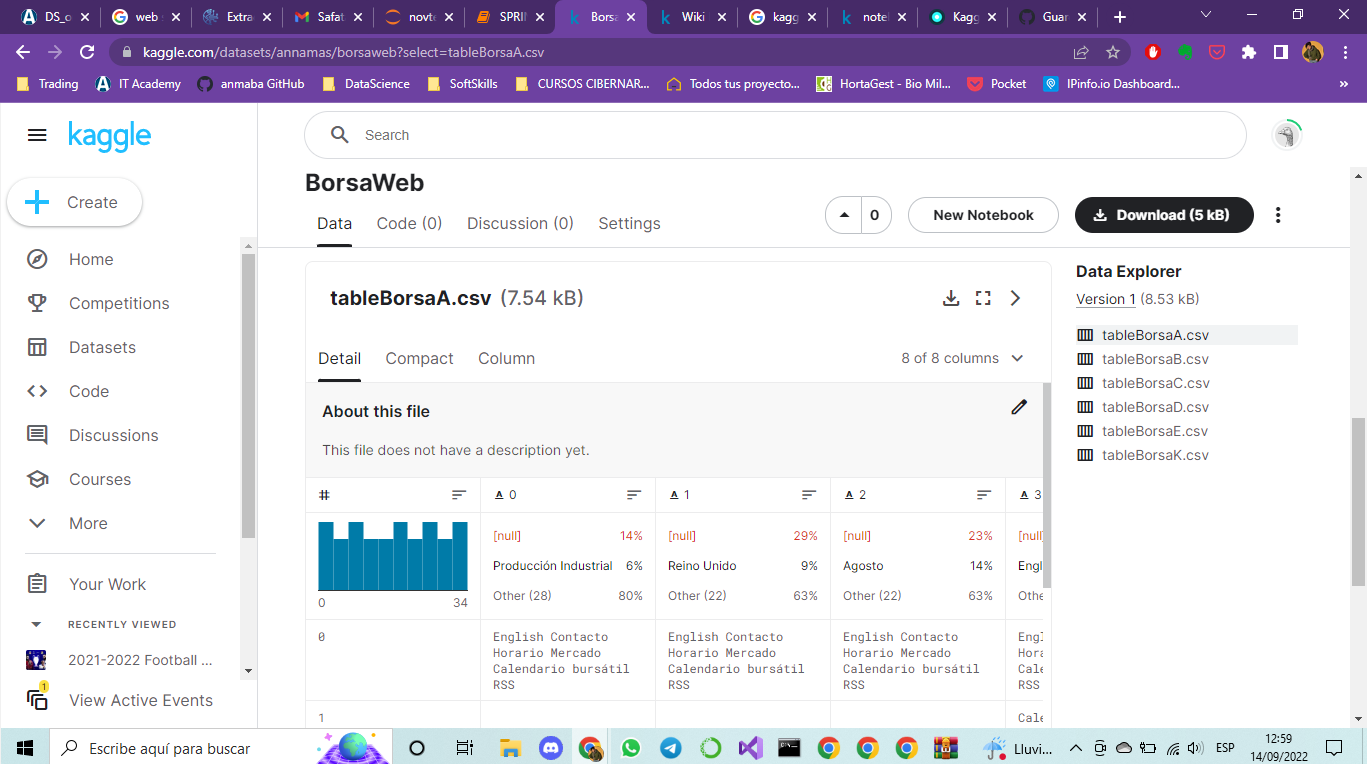


- URL de les taules del buscador de la wikipedia visualitzades amb Kaggle
    
    https://kaggle.com/datasets/e29de6265f8923d52a5e8a95299e0c2e9af840fe1abfe6e1965a36c3fcc5de38

  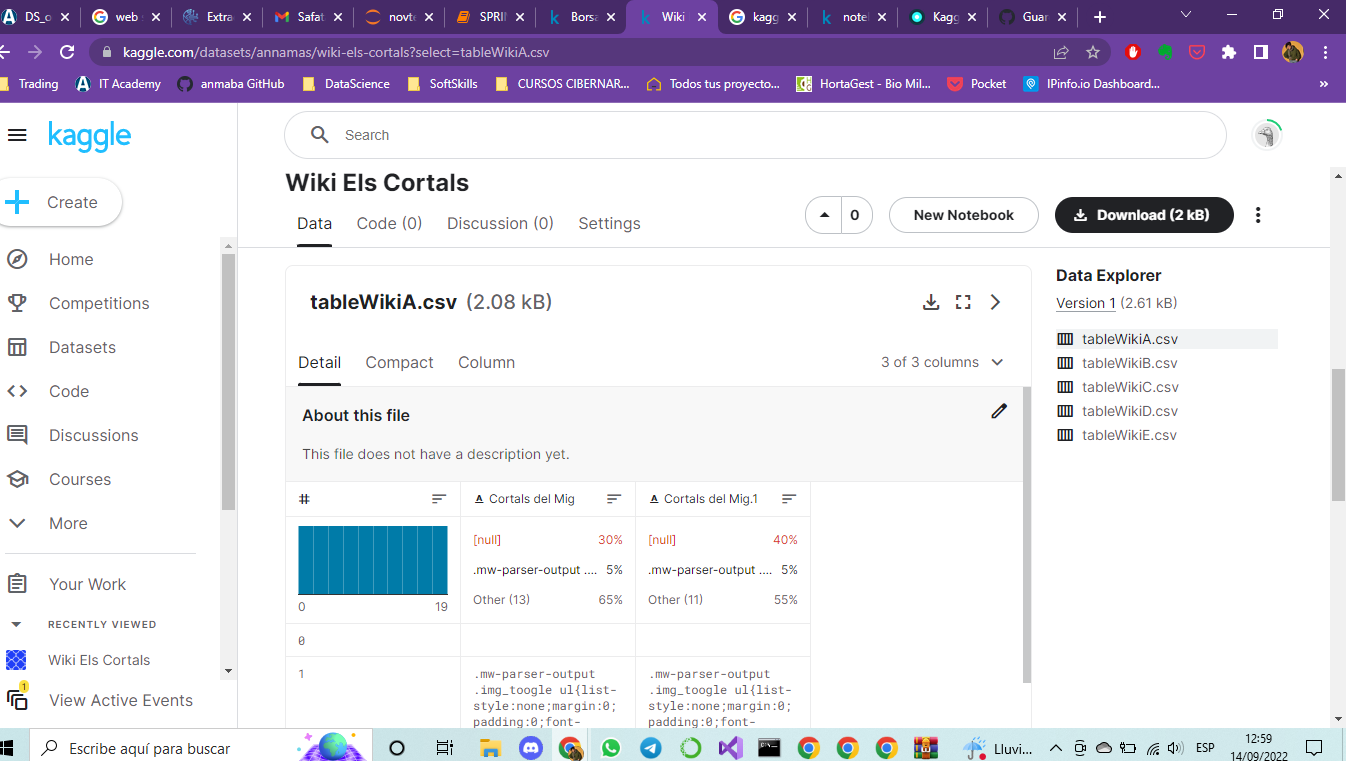      



## EXERCICI 3
Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després. 

### PÀGINA WEB DE NOVTEC AMB SELENIUM

In [66]:
# Crida a les llibreries de selenium i del driver de Chorme, i obro i tanco una sessió

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options as ChromeOptions


op = webdriver.ChromeOptions()

op.add_argument('--enable-extensions')

novtecSelenium = webdriver.Chrome(options=op)

In [67]:
# Activo la pàgina web
novtecSelenium.get("http://novtec.es/ca/")


In [68]:
# Demano informació del web, en aquest cas el títol de la pàgina web
title = novtecSelenium.title
print(title)

NOVTEC – Empresa dedicada al desenvolupament i posada en marxa de noves tecnologies per a tots els sectors d'activitat


In [69]:
# Mostrar URL
print(novtecSelenium.current_url)

http://novtec.es/ca/


In [70]:
# Mostrar pàgina en HTML
print(novtecSelenium.page_source)

<html lang="ca" class=" no-htmlimports no-proximity sizes no-flash transferables no-applicationcache blobconstructor blob-constructor cookies cors customelements no-customprotocolhandler customevent dataview eventlistener geolocation history no-ie8compat json messagechannel notification postmessage queryselector no-serviceworker svg templatestrings typedarrays websockets no-xdomainrequest webaudio cssescape focuswithin supports target no-microdata mutationobserver passiveeventlisteners picture es5array es5date es5function es5object strictmode es5string es5syntax es5undefined es5 es6array arrow es6collections generators es6math es6number es6object promises es6string no-devicemotion no-deviceorientation filereader beacon no-lowbandwidth eventsource fetch xhrresponsetype xhr2 speechsynthesis localstorage sessionstorage websqldatabase svgfilters urlparser urlsearchparams no-getusermedia websocketsbinary atobbtoa atob-btoa no-framed sharedworkers webworkers no-contains no-contextmenu cssall

limit_output extension: Maximum message size of 10000 exceeded with 246812 characters

Establir una estratègia d'espera
Sincronitzar el codi amb l'estat actual del navegador és un dels grans reptes de Selenium, i fer-ho bé és un tema avançat.

Bàsicament, voleu assegurar-vos que l'element es troba a la pàgina abans d'intentar localitzar-lo i que l'element estigui en un estat d'interacció abans d'intentar interactuar amb ell.

Una espera implícita rarament és la millor solució, però aquí és la més fàcil de demostrar, així que l'utilitzarem com a marcador de posició.

In [71]:
novtecSelenium.implicitly_wait(0.5)

In [72]:
# Interactuar amb elements de classe

elementClasse = novtecSelenium.find_elements(by = By.CLASS_NAME, value="header-area")
for el in elementClasse:
    print(el.text)

Carretera de Ribes 3 Baixos, Aiguafreda (BCN) 93 844 24 26
Català


In [73]:
# Interactuar amb elements de classe

elementClasse2 = novtecSelenium.find_elements(by = By.CLASS_NAME, value="to-top")
for el in elementClasse2:
    print(el.text)

In [74]:
# Interactuar amb elements amb una taula
import pandas as pd

taula = novtecSelenium.page_source
llista = pd.read_html(taula)

len(llista)


1

In [75]:
# Podem extreure 1 taules diferents, per tant les podríem anar imprimint per veure què contenen

taulaA = llista[0]
taulaA.to_csv('table.csv')
taulaA

,Galeta,Duració,Descripció
0,cookielawinfo-checkbox-analytics,11 mesos,Aquesta cookie esta definida pel GDPR Cookie C...
1,cookielawinfo-checkbox-functional,11 mesos,Aquesta cookie esta definida pel GDPR Cookie C...
2,cookielawinfo-checkbox-necessary,11 mesos,Aquesta cookie esta definida pel GDPR Cookie C...
3,cookielawinfo-checkbox-others,11 mesos,Aquesta cookie esta definida pel GDPR Cookie C...
4,cookielawinfo-checkbox-performance,11 mesos,Aquesta cookie esta definida pel GDPR Cookie C...
5,viewed_cookie_policy,11 mesos,Aquesta cookie esta definida pel GDPR Cookie C...


### PÀGINA WEB DE NOVTEC AMB SCRAPY

In [76]:
import scrapy
from twisted.internet import reactor
from scrapy.crawler import CrawlerRunner
from scrapy.utils.project import get_project_settings

class NovtecSpider(scrapy.Spider):
    name = 'webNovtec'
    def start_requests(self):
        urls = ['http://novtec.es/ca/']
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)
    

   
    def parse(self, response):
        pagina = response.url.split("/")[-2]
        nom = f"novtecNom-{pagina}.html"
        with open(nom, "wb") as f:
            f.write(response.body)
        self.log(f"Document guardat {nom}")
        
        
 